# A notebook to run the whole workflow with NetworkX

14/08/20

In parallel to the `test.py` script.

### Undirected

In [1]:
from mtsim import MTMnx
from mtsim.sample_networks import load_network_2

In [2]:
df_nodes, df_link_types, df_links = load_network_2()

In [3]:
df_nodes.head(2)

,id,is_zone,code,name,coords,pop,n_zam,n_pm,n_stud_vs,n_stud_zs_ss
0,1,0,NaN,NaN,"(1914068.2805,6131920.7668)",NaN,NaN,NaN,NaN,NaN
1,2,0,NaN,NaN,"(1960345.9816,6156425.4523)",NaN,NaN,NaN,NaN,NaN


In [4]:
df_link_types.head(2)

,id,name,qmax,v0,a,b
0,1,D_6,70000,110,0.15,4
1,2,D_4,50000,125,0.15,4


In [5]:
df_links.head(2)

,id,node_from,node_to,type,l,name,count
0,1,1,2,1,36.000,BA-TT D1,45085.0
1,2,2,3,2,36.006,TT-NR R1,25135.0


In [6]:
# MTM object
mtm = MTMnx()
mtm.read_data(df_nodes, df_link_types, df_links)
mtm.compute_skims()
mtm.generate("ALL", "pop", "pop", 0.3)
mtm.distribute("ALL", "t0", "exp", 0.02)
mtm.assign("tcur")

In [7]:
mtm.df_links.head()

id  type       l              name    count   qmax   v0  \
node_from node_to                                                            
1         2         1     1  36.000          BA-TT D1  45085.0  70000  110   
2         3         2     2  36.006          TT-NR R1  25135.0  50000  125   
          4         3     2  75.005          TT-TN D1  19088.0  50000  125   
4         5         4     2  71.690          TN-ZA D1  17280.0  50000  125   
5         6         5     5  24.330  ZA-MT I/18, I/65  20196.0  15000   65   

                      a  b         t0             q        tcur        vcur  
node_from node_to                                                            
1         2        0.15  4  19.636364  91674.023936   28.300900   76.322660  
2         3        0.15  4  17.282880  68541.749241   26.437664   81.715238  
          4        0.15  4  36.002400  53550.530451   43.107952  104.396053  
4         5        0.15  4  34.411200  43080.246798   37.255817  115.455796  
5         6        0.15  4  22.458462  42426.754323  238.066755    6.131894

In /Users/peter/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/peter/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/peter/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


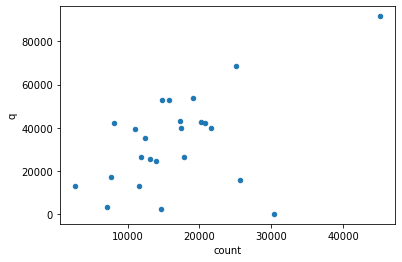

In [8]:
mtm.df_links.plot.scatter(x="count", y="q")

## Directed MTM with Networkx

In [9]:
from mtsim import DiMTMnx
from mtsim.sample_networks import load_network_2_directed

In [10]:
df_nodes, df_link_types, df_links = load_network_2_directed()

In [11]:
mtm = DiMTMnx()
mtm.read_data(df_nodes, df_link_types, df_links)
mtm.compute_skims()
mtm.generate("ALL", "pop", "pop", 0.3)
mtm.distribute("ALL", "t0", "exp", 0.02)
mtm.assign("tcur")

In [12]:
mtm.df_links.head()

id  type       l      name    count   qmax   v0     a  b  \
node_from node_to                                                             
1         2         1     1  36.000  BA-TT D1  22542.5  70000  110  0.15  4   
2         1         1     1  36.000  BA-TT D1  22542.5  70000  110  0.15  4   
          3         2     2  36.006  TT-NR R1  12567.5  50000  125  0.15  4   
3         2         2     2  36.006  TT-NR R1  12567.5  50000  125  0.15  4   
2         4         3     2  75.005  TT-TN D1   9544.0  50000  125  0.15  4   

                          t0             q       tcur        vcur  
node_from node_to                                                  
1         2        19.636364  45559.268332  20.164891  107.116872  
2         1        19.636364  46114.755604  20.191142  106.977602  
          3        17.282880  34087.529861  17.842908  121.076679  
3         2        17.282880  34454.219380  17.867397  120.910730  
2         4        36.002400  26614.202415  36.435907  123.512774

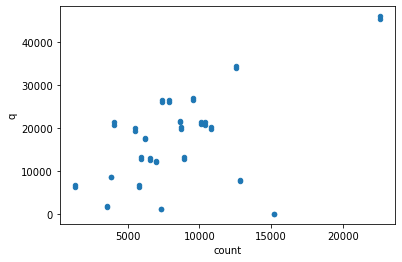

In [13]:
mtm.df_links.plot.scatter(x="count", y="q")